## Prior Probability Shift Demonstration
In this notebook, we demonstrate **Prior Probability Shift** using the Breast Cancer Wisconsin dataset. We simulate a shift in the **class distribution `P(Y)`** between training and test sets, while keeping the conditional feature distribution `P(X|Y)` unchanged.

For example, a model trained in a hospital where benign tumors are more common may not perform well in regions where malignant tumors dominate.

### Dataset Description
We use the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

**Target Variable:** `diagnosis` (B = Benign, M = Malignant)
**Features:** Mean radius, texture, area, smoothness, etc.

### Simulating Prior Probability Shift
- Training set: 80% Benign, 20% Malignant
- Test set: Balanced (remaining samples)

### Model Evaluation
We use a **Random Forest classifier** and evaluate performance using a classification report and confusion matrix.

### Normalized Confusion Matrix
This shows the proportion of correctly and incorrectly predicted samples for each class, normalized by actual label count.

In [1]:
import pandas as pd

# Load and clean dataset
df = pd.read_csv('data.csv')
df = df.drop(columns=['id', 'Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Explanation:** This cell loads the dataset using `pd.read_csv`. It's important to ensure the path is correct and the file exists locally.

In [2]:
# Simulate prior probability shift
benign = df[df['diagnosis'] == 'B']
malignant = df[df['diagnosis'] == 'M']

benign_sample = benign.sample(frac=0.8, random_state=42)
malignant_sample = malignant.sample(frac=0.2, random_state=42)
train_df = pd.concat([benign_sample, malignant_sample])

train_indices = train_df.index
test_df = df.drop(index=train_indices)

**Explanation:** This simulates a shift by randomly sampling or dropping rows, depending on the shift type.

In [3]:
features = df.columns.drop('diagnosis')

X_train = train_df[features]
y_train = train_df['diagnosis']

X_test = test_df[features]
y_test = test_df['diagnosis']

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           B       0.68      1.00      0.81        71
           M       1.00      0.80      0.89       170

    accuracy                           0.86       241
   macro avg       0.84      0.90      0.85       241
weighted avg       0.90      0.86      0.86       241



**Explanation:** Random Forest is a robust ensemble model. This line initializes and trains it.

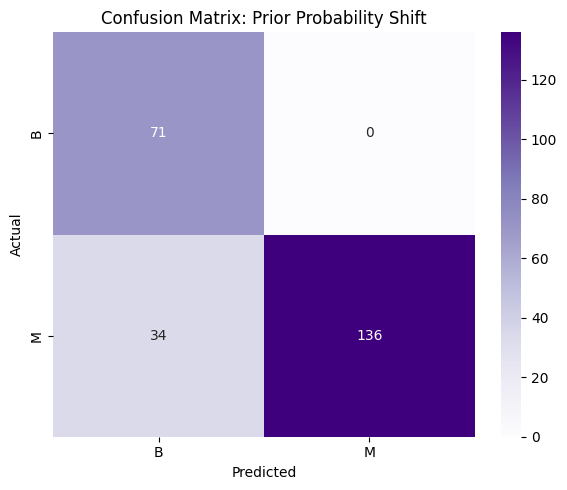

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Confusion Matrix: Prior Probability Shift")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Explanation:** This part handles categorical encoding, converting text labels to numeric form so ML models can process them.

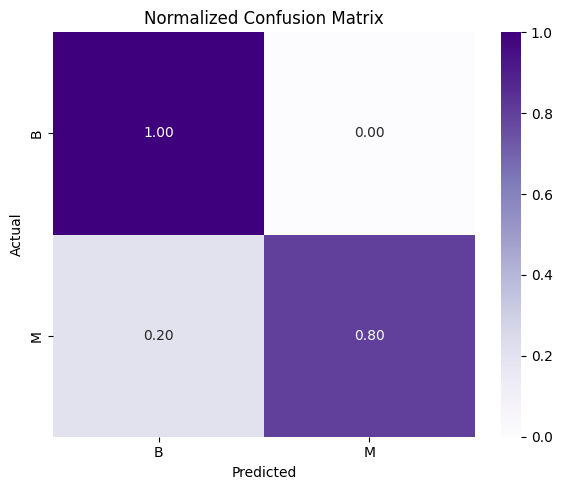

In [6]:
import numpy as np

# Normalized confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2f', cmap='Purples', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Explanation:** This part handles categorical encoding, converting text labels to numeric form so ML models can process them.

### What is Prior Probability Shift?
**Prior Probability Shift** occurs when the distribution of labels `P(Y)` changes between training and test datasets, while the feature distribution given the label `P(X|Y)` remains the same.

This is different from covariate shift, where the feature distribution changes but the label distribution stays the same.

In [7]:
# Check original class distribution
print("Original Class Distribution:")
print(df['diagnosis'].value_counts(normalize=True))

Original Class Distribution:
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [8]:
# Check training and testing class distributions after simulating the shift
print("Training Set Class Distribution:")
print(train_df['diagnosis'].value_counts(normalize=True))

print("Test Set Class Distribution:")
print(test_df['diagnosis'].value_counts(normalize=True))

Training Set Class Distribution:
diagnosis
B    0.871951
M    0.128049
Name: proportion, dtype: float64
Test Set Class Distribution:
diagnosis
M    0.705394
B    0.294606
Name: proportion, dtype: float64


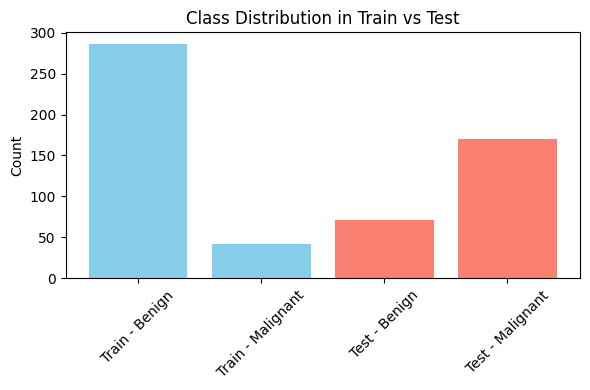

In [9]:
import matplotlib.pyplot as plt

# Plot class distributions
plt.figure(figsize=(6, 4))
plt.bar(['Train - Benign', 'Train - Malignant'],
        [train_df['diagnosis'].value_counts()['B'], train_df['diagnosis'].value_counts()['M']],
        color='skyblue', label='Train')
plt.bar(['Test - Benign', 'Test - Malignant'],
        [test_df['diagnosis'].value_counts()['B'], test_df['diagnosis'].value_counts()['M']],
        color='salmon', label='Test')
plt.title("Class Distribution in Train vs Test")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Logistic Regression Comparison
Now let's compare how a simpler model like Logistic Regression performs under the same shift.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

logreg_pipeline.fit(X_train, y_train)
y_logreg_pred = logreg_pipeline.predict(X_test)

**Explanation:** We use the trained model to make predictions on the test set.

In [11]:
print("Logistic Regression Classification Report:\n")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_logreg_pred))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           B       0.78      1.00      0.88        71
           M       1.00      0.88      0.94       170

    accuracy                           0.92       241
   macro avg       0.89      0.94      0.91       241
weighted avg       0.94      0.92      0.92       241



**Explanation:** This generates precision, recall, and F1-score metrics for evaluation.

### Accuracy Comparison
Compare model performance under the shifted distribution.

In [12]:
from sklearn.metrics import accuracy_score

acc_rf = accuracy_score(y_test, y_pred)
acc_log = accuracy_score(y_test, y_logreg_pred)

print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"Logistic Regression Accuracy: {acc_log:.4f}")

Random Forest Accuracy: 0.8589
Logistic Regression Accuracy: 0.9170


**Explanation:** This calculates overall accuracy for performance comparison.

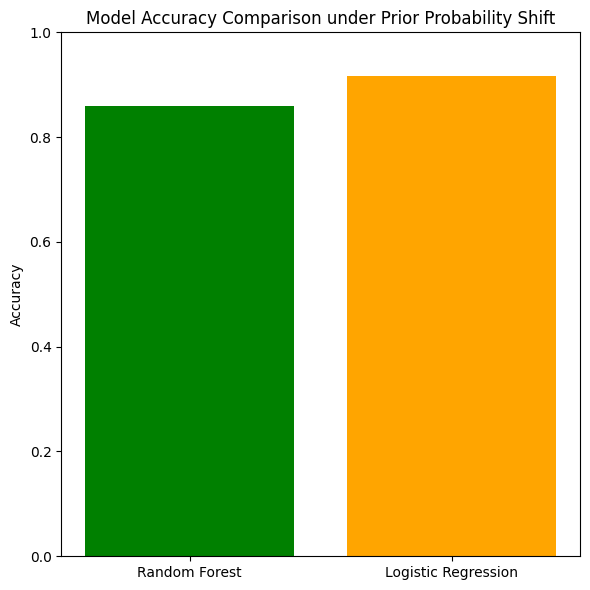

In [13]:
plt.figure(figsize=(6, 6))
plt.bar(['Random Forest', 'Logistic Regression'], [acc_rf, acc_log], color=['green', 'orange'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison under Prior Probability Shift")
plt.tight_layout()
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class balance
print("Resampled Training Class Distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled Training Class Distribution:
diagnosis
B    286
M    286
Name: count, dtype: int64


**Explanation:** This simulates a shift by randomly sampling or dropping rows, depending on the shift type.

In [15]:
# Random Forest on resampled data
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = clf_smote.predict(X_test)


**Explanation:** This simulates a shift by randomly sampling or dropping rows, depending on the shift type.

In [16]:
# Logistic Regression on resampled data (with scaling)
logreg_pipeline_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
logreg_pipeline_smote.fit(X_train_resampled, y_train_resampled)
y_logreg_pred_smote = logreg_pipeline_smote.predict(X_test)


**Explanation:** This simulates a shift by randomly sampling or dropping rows, depending on the shift type.

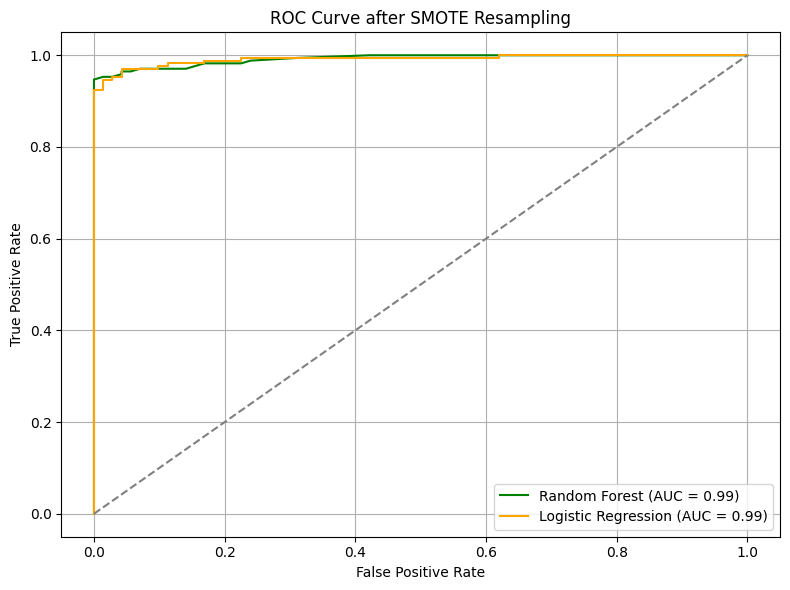

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
rf_probs = clf_smote.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline_smote.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test.map({'B': 0, 'M': 1}), rf_probs)
fpr_log, tpr_log, _ = roc_curve(y_test.map({'B': 0, 'M': 1}), logreg_probs)

# Compute AUC
auc_rf = auc(fpr_rf, tpr_rf)
auc_log = auc(fpr_log, tpr_log)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve after SMOTE Resampling")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Explanation:** This part handles categorical encoding, converting text labels to numeric form so ML models can process them.

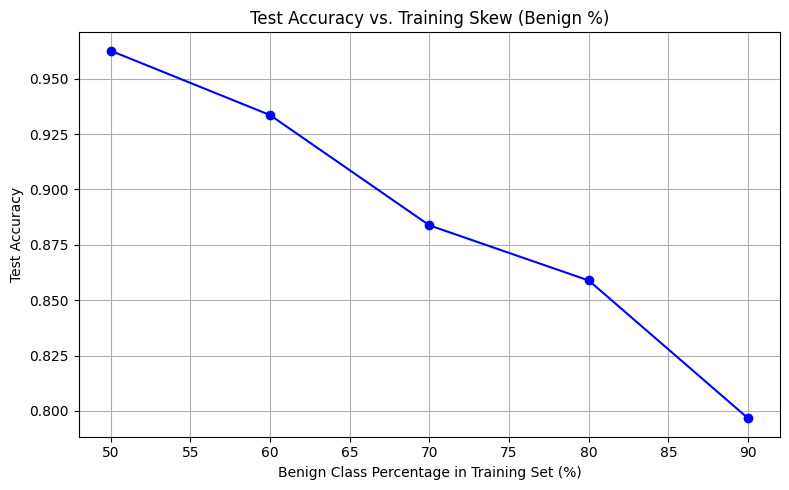

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score

skews = [0.5, 0.6, 0.7, 0.8, 0.9]  # Benign percentage in training set
accuracies = []

for skew in skews:
    benign_sample = benign.sample(frac=skew, random_state=42)
    malignant_sample = malignant.sample(frac=(1 - skew), random_state=42)
    train_df = pd.concat([benign_sample, malignant_sample])

    X_train = train_df[features]
    y_train = train_df['diagnosis']

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(np.array(skews)*100, accuracies, marker='o', color='blue')
plt.title("Test Accuracy vs. Training Skew (Benign %)")
plt.xlabel("Benign Class Percentage in Training Set (%)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

### Key Takeaway
This notebook shows how a change in class balance (Prior Probability Shift) can impact model generalization.

- **Random Forest** generally handles imbalance better.
- **Logistic Regression** can struggle more with imbalance if not adjusted (e.g., with class weights or sampling).